# About Dataset
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Import Library

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Dataset

In [21]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Basic information about Dataset

In [22]:
# to see first 5 rows
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
#to see last 5 rows
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [24]:
# to see sample 5 rows
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
492,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
656,657,0,3,"Radeff, Mr. Alexander",male,NaN,0,0,349223,7.8958,NaN,S
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,NaN,S
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.5000,NaN,S
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S


In [25]:
# to see data shape
df.shape

(891, 12)

In [26]:
# to see columns name
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
# to see columns data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
# to see basic info about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
# to see basic descriptive statistics

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning & Preprocessing

In [30]:
# to check duplicated values

df.duplicated().sum()

0

Great ! No duplicated value has dataste.

In [31]:
# to drop unwanted columns
df.drop(['PassengerId'],axis=1,inplace=True)

In [32]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [33]:
# to check null values

df.isna().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

In [46]:
missing_value_per=df.isna().sum()/df.isna().count()
missing_value_per

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [34]:
# handelling missing value Age Columns
df['Age'].median()

28.0

In [37]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [38]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [39]:
# handelling missing value Embarked Columns
df['Embarked'].mode()

0    S
dtype: object

In [42]:
df['Embarked'].replace(np.nan, 'S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [48]:
# Cabin Column drop becauce missing value is crossed 20% so drop this column
df.drop(['Cabin'],axis=1,inplace=True)

In [49]:
# Again Check Null values
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [59]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

 Great ! Data set has no null Value.

# Data Preprocessing

In [60]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Family_Type
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,Medium
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,Medium


In [61]:
# create new columns
df['Family Size']=df['SibSp']+df['Parch']

In [62]:
# Cretae new columns Family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number > 0 and number <=4:
        return "Medium"
    else:
        return "Large"

In [63]:
df['Family_Type']=df['Family Size'].apply(family_type)

In [64]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Family_Type
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,Medium
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,Medium


# Exploratory Data Analysis

In [65]:
# value count sex
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

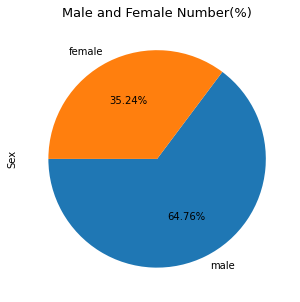

In [79]:
# plot pie
plt.figure(figsize=(10,5))
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f%%',startangle=180)
plt.title('Male and Female Number(%)',fontsize=13);

Observe: There were more men on the Titanic ship.

In [82]:
# Vlaue count of survived 
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

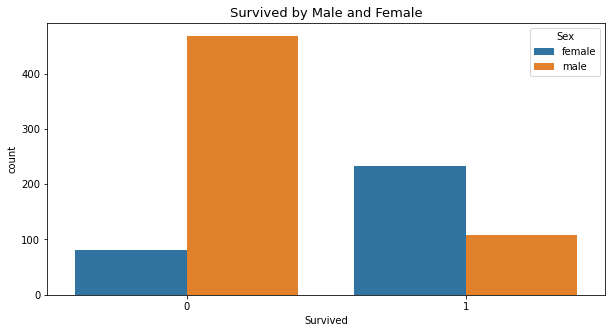

In [88]:
# Plot Survived in barplot
plt.figure(figsize=(10,5))
sns.countplot(x=df['Survived'],data=df,palette='tab10',hue='Sex')
plt.title('Survived by Male and Female',fontsize=13);

observe:Chance of female survival is higher than male survival.

In [90]:
# Family_Type count
df['Family_Type'].value_counts()

Alone     537
Medium    307
Large      47
Name: Family_Type, dtype: int64

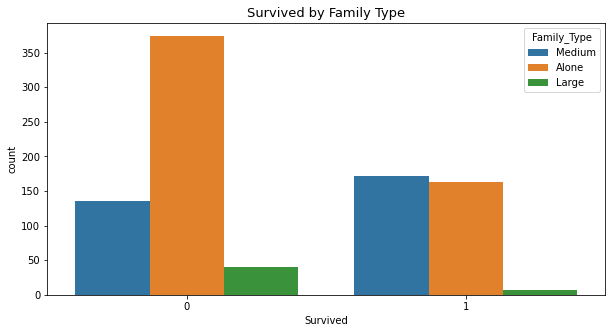

In [92]:
# Plot Survived by family size in barplot
plt.figure(figsize=(10,5))
sns.countplot(x=df['Survived'],data=df,palette='tab10',hue='Family_Type')
plt.title('Survived by Family Type',fontsize=13);

Observe: People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone

In [93]:
# Pclass Count
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

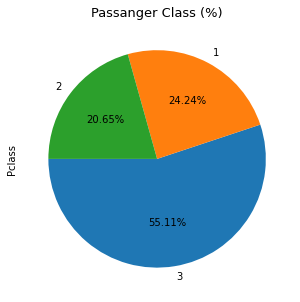

In [98]:
#plot pie chart 
plt.figure(figsize=(10,5))
df['Pclass'].value_counts().plot(kind='pie',autopct='%.2f%%',startangle=180)
plt.title('Passanger Class (%)',fontsize=13);

Observe: More passengers travel on the Titanic ship than third class.

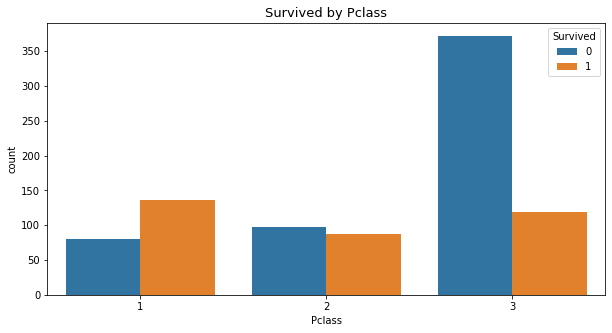

In [100]:
# Plot Survived by family size in barplot
plt.figure(figsize=(10,5))
sns.countplot(x=df['Pclass'],data=df,palette='tab10',hue='Survived')
plt.title('Survived by Pclass',fontsize=13);

Observe: Those who traveled in the third class died the most.

In [101]:
# Pclass Count
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

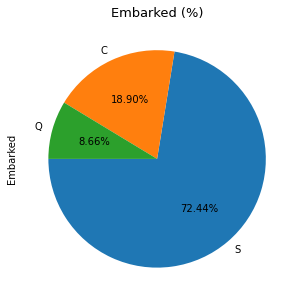

In [102]:
#plot pie chart 
plt.figure(figsize=(10,5))
df['Embarked'].value_counts().plot(kind='pie',autopct='%.2f%%',startangle=180)
plt.title('Embarked (%)',fontsize=13);

Ovserve: More passenger travel from the Suthampton port.

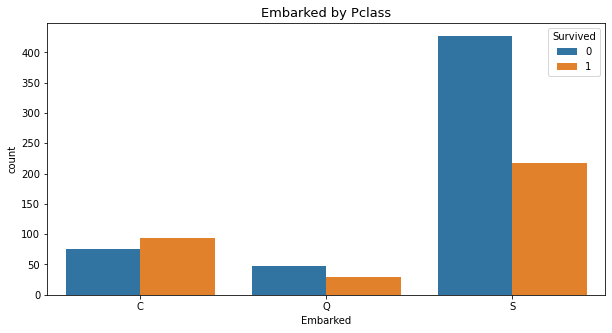

In [106]:
# Plot Survived by family size in barplot
plt.figure(figsize=(10,5))
sns.countplot(x=df['Embarked'],data=df,palette='tab10',hue='Survived')
plt.title('Embarked by Pclass',fontsize=13);

observe: Most of those passenger in died  who traveled from Southampton port.

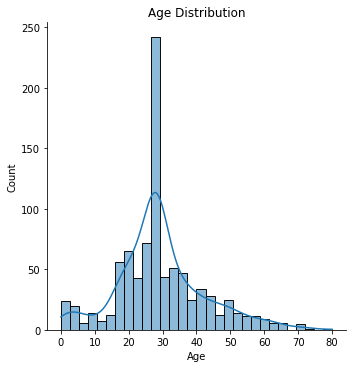

In [114]:
# Age Column Distribution
#plt.figure(figsize=(10.6))
sns.displot(x=df['Age'],kde=True)
plt.title('Age Distribution');

Observe: Most of the passenger year range 27-30.

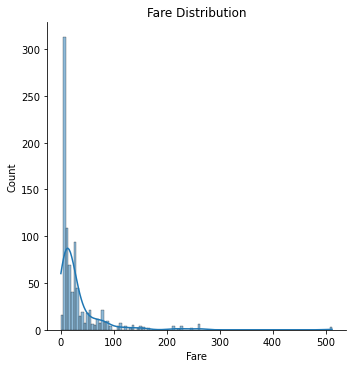

In [116]:
# fare  Column Distribution
#plt.figure(figsize=(10.6))
sns.displot(x=df['Fare'],kde=True)
plt.title('Fare Distribution');

observe: A lot of people had cheaper tickets

<AxesSubplot:xlabel='Age', ylabel='Fare'>

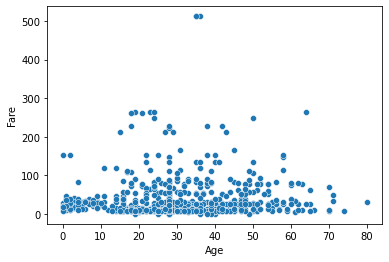

In [121]:
# Relationship Between Fare and Age Columns
sns.scatterplot(x=df['Age'],y=df['Fare'],data=df)

In [130]:
print('People with age betwwn range 50 and 70  :',df[(df['Age'] >50) & (df['Age'] < 70)].shape[0])

People with age betwwn range 50 and 70  : 57


In [134]:
df[(df['Survived']==1) & (df['Age'] > 70)].shape[0]

1

In [136]:
df[(df['Sex']=='female') & (df['Age'] > 60)].shape[0]

3

C:\Users\Rakib Hasan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rakib Hasan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


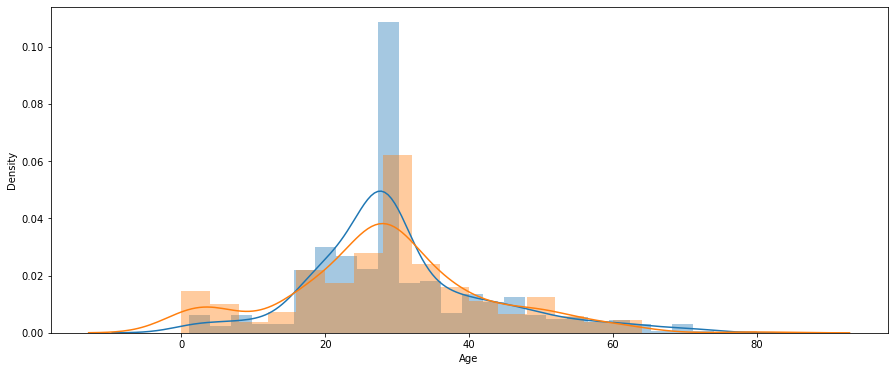

In [138]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age']);

Insight:
1. There were more men on the Titanic ship.
2. Chance of female survival is higher than male survival.
3. People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone.
4. Most passengers travel on the Titanic ship in  third class cabin.
5. Those who traveled in the third class died the most.
6. Most of the  passenger travel from the Suthampton port.
7. Most of those passenger in died who traveled from Southampton port.
8. Most of the passenger year range 27-30.
9. A lot of people had cheaper tickets
10. People with age betwwn range 50 and 70  : 57